# Introduction to Neural Network Classification with TensorFlow



## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Chck out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand, visualise it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": x[:, 0], "X1": x[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


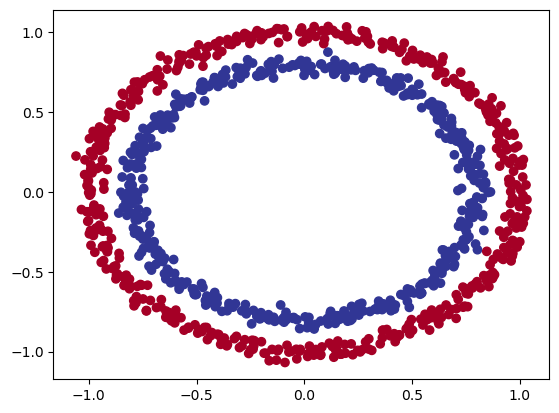

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(x), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

In [9]:
import tensorflow as tf
tf.__version__
import numpy as np

2023-07-27 14:34:47.817168: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 14:34:48.515286: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [10]:
# import tensorflow as tf
# tf.random.set_seed(42)

# # 1. Create a model
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(224, 224, 3)),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(3, activation="softmax"),
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # 3. Fit the model
# model.fit(x, y, epochs=5)

# # 4. Evaluate the model
# model.evalute(x, y)

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x, y, epochs=5)

2023-07-27 14:34:56.400486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 4.6892 - accuracy: 0.4530
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 3.7416 - accuracy: 0.4810
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7953 - accuracy: 0.5010
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7187 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.4960


In [12]:
# let's improve our model by training for longer
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932721138000488, 0.5]

## Improve our model


1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

In [15]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4970


[0.6937169432640076, 0.4970000088214874]

To visualize our model's predictions, let's create a function plot_decision_boundary() which will:
* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as a line between zones (where each unique class falls).

In [17]:
def plot_decision_boundary(model, x, y):
    """Plot the decision boundary created by a model predicting on x.

    Args:
        model (_type_): _description_
        x (_type_): _description_
        y (_type_): _description_
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Create x values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classification


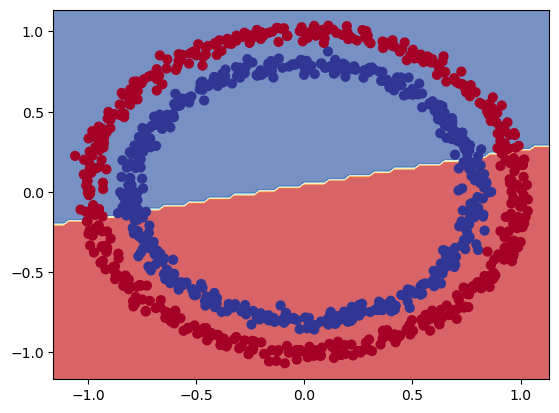

In [18]:
# Check Out the predictions our model is making
plot_decision_boundary(model=model_3, x=x, y=y)

In [21]:
# lets see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our regression data into training and test sets
x_reg_train = x_regression[:150]
y_reg_train = y_regression[:150]
x_reg_test = x_regression[150:]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/gzm/anaconda3/envs/ml_env/lib/python3.10/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


In [22]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model with a regression loss function
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=1), y_reg_train, epochs=100, verbose=0)

2/2 [==============================] - 0s 5ms/step


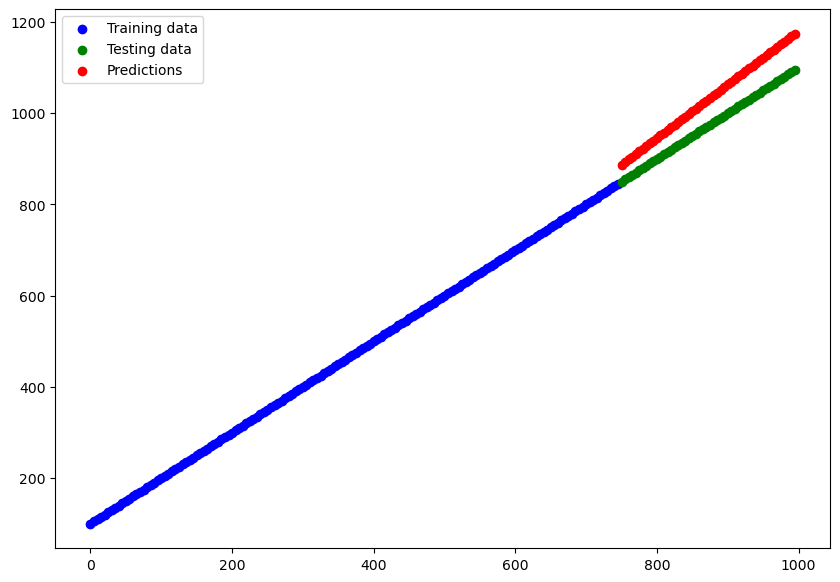

In [23]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(x_reg_test, axis=1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(x_reg_test, y_reg_preds.squeeze(), c="r", label="Predictions")
plt.legend();

# The Missing Piece: Non-Linearity

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.3469 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7119 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1405 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3512 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3007 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2674 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 1.2384 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2127 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1891 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1674 - accuracy: 0.5000
Epoch 11/

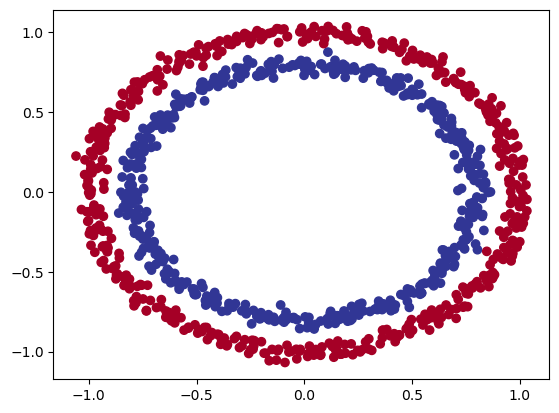

In [25]:
# Check out our data 
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 4ms/step
doing binary classification


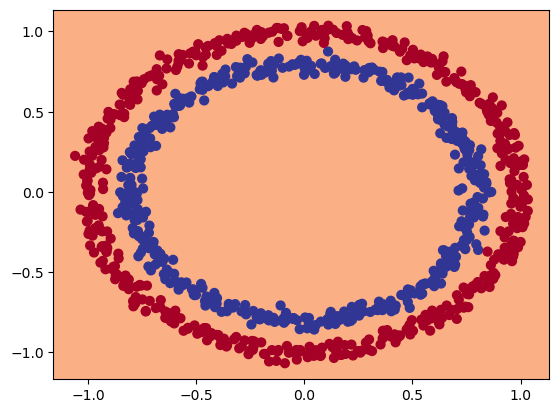

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, x=x, y=y)

In [27]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 5.4487 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3661 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3329 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3157 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3095 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 5.3003 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2956 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 5.2945 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 5.2936 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 5.2842 - accuracy: 0.4760
Epoch 11/